<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# Detailed summary of datatypes and non-null counts
print(df.info())

# Create a summary dataframe
summary = pd.DataFrame({
    'DataType': df.dtypes,
    'TotalCount': df.shape[0],
    'Non-Null Count': df.count(),
    'Missing Values': df.isnull().sum(),
    'Percentage Missing (%)': (df.isnull().sum() / len(df)) * 100
})

print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
                    DataType  TotalCount  Non-Null Count  Missing Values  \
ResponseId             int64       65437           65437               0   
MainBranch            object       65437           65437               0   
Age                   object       65437           65437               0   
Employment            object       65437           65437               0   
RemoteWork            object       65437           54806           10631   
...                      ...         ...             ...             ...   
JobSatPoints_11      float64       65437           29445           35992   
SurveyLength          object       65437           56182            9255   
SurveyEase            object       65437           56238            9199   
ConvertedCompYearly  float64       65437          

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
# Identify numerical columns
# This selects columns with float or integer datatypes
numeric_cols = df.select_dtypes(include=['number']).columns

print(f"Numerical columns found: {list(numeric_cols)}")

# Impute missing values with the mean for each numeric column
for col in numeric_cols:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

# Verify that there are no remaining missing values in these columns
missing_after = df[numeric_cols].isnull().sum()
print("\nMissing values after imputation:")
print(missing_after)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"Categorical columns identified: {list(categorical_cols)}")

# Impute with the most frequent value (Mode)
for col in categorical_cols:
    # .mode() returns a Series (in case of ties), so we take the first item [0]
    majority_value = df[col].mode()[0]
    df[col] = df[col].fillna(majority_value)

# Verify the results
remaining_missing = df[categorical_cols].isnull().sum().sum()
print(f"Total missing values in categorical columns after imputation: {remaining_missing}")

Numerical columns found: ['ResponseId', 'CompTotal', 'WorkExp', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'ConvertedCompYearly', 'JobSat']

Missing values after imputation:
ResponseId             0
CompTotal              0
WorkExp                0
JobSatPoints_1         0
JobSatPoints_4         0
JobSatPoints_5         0
JobSatPoints_6         0
JobSatPoints_7         0
JobSatPoints_8         0
JobSatPoints_9         0
JobSatPoints_10        0
JobSatPoints_11        0
ConvertedCompYearly    0
JobSat                 0
dtype: int64
Categorical columns identified: ['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'LanguageHaveWorkedWith', 'LanguageWant

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
## Write your code here
# Calculate value counts for Employment
employment_counts = df['Employment'].value_counts()
print("--- Employment Distribution ---")
print(employment_counts)

# Calculate value counts for Job Satisfaction
# This reveals the overall sentiment of the respondents
jobsat_counts = df['JobSat'].value_counts()
print("\n--- Job Satisfaction Distribution ---")
print(jobsat_counts)

# Calculate value counts for Professional Experience
yearscodepro_counts = df['YearsCodePro'].value_counts()
print("\n--- Years of Professional Experience (Top 10) ---")
print(yearscodepro_counts.head(10))

--- Employment Distribution ---
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but loo

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


JobSat
6.935041     55.490013
8.000000     11.475159
7.000000      9.748308
6.000000      5.732231
9.000000      5.541208
10.000000     3.439950
5.000000      2.989135
3.000000      1.780338
4.000000      1.726852
2.000000      1.179761
0.000000      0.475266
1.000000      0.421780
Name: proportion, dtype: float64


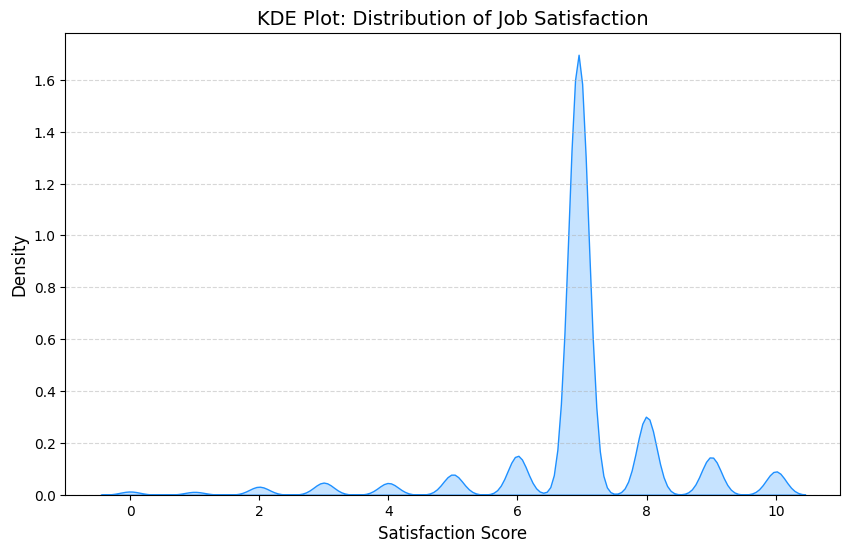

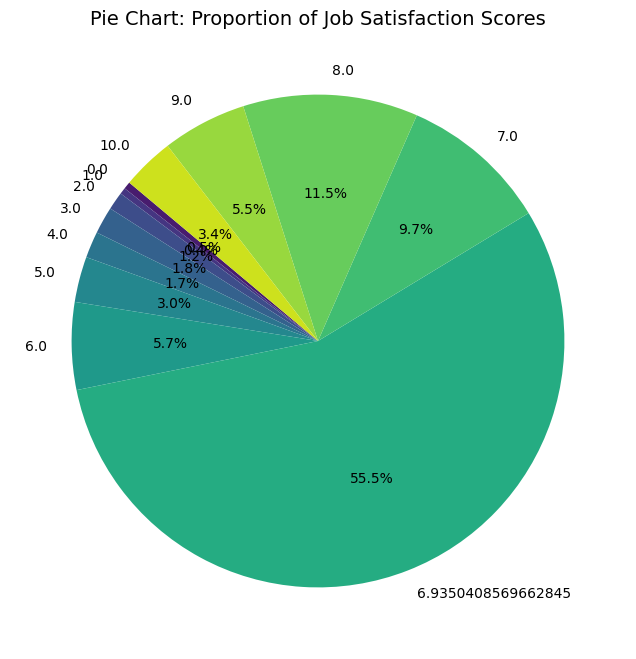

In [6]:
## Write your code here
# Show the percentage of respondents for each JobSat level
jobsat_percentage = df['JobSat'].value_counts(normalize=True) * 100
print(jobsat_percentage)

# KDE Plot (Continuous distribution)
plt.figure(figsize=(10, 6))
sns.kdeplot(df['JobSat'], fill=True, color="dodgerblue", bw_adjust=1)
plt.title('KDE Plot: Distribution of Job Satisfaction', fontsize=14)
plt.xlabel('Satisfaction Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('jobsat_kde_plot.png')

# Pie Chart (Proportional distribution)
plt.figure(figsize=(8, 8))
# Get counts and labels
jobsat_counts = df['JobSat'].value_counts().sort_index()
plt.pie(jobsat_counts, labels=jobsat_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('viridis', len(jobsat_counts)))
plt.title('Pie Chart: Proportion of Job Satisfaction Scores', fontsize=14)
plt.savefig('jobsat_pie_chart.png')

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


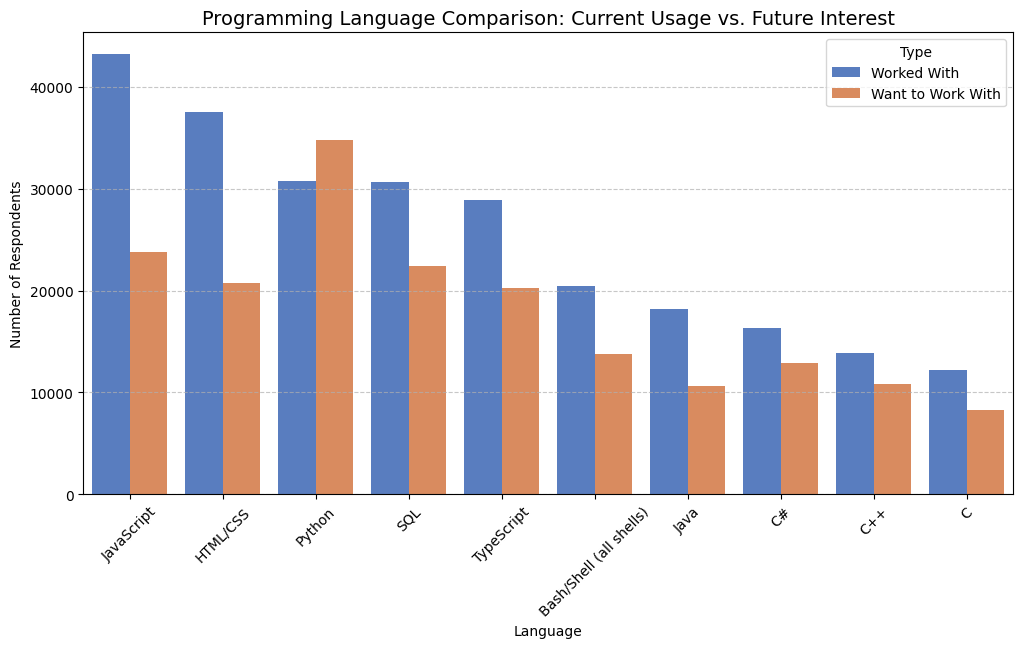

In [7]:
## Write your code here
# Helper function to extract and count languages from a column
def get_language_counts(df, column_name):
    # Split by semicolon and explode to create one row per language
    return df[column_name].str.split(';').explode().value_counts()

# Get counts for both columns
have_counts = get_language_counts(df, 'LanguageHaveWorkedWith')
want_counts = get_language_counts(df, 'LanguageWantToWorkWith')

# Combine counts into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Language': have_counts.index,
    'Worked With': have_counts.values
}).merge(pd.DataFrame({
    'Language': want_counts.index,
    'Want to Work With': want_counts.values
}), on='Language', how='outer').fillna(0)

# Sort by current popularity and take the top 10
top_10_comparison = comparison_df.sort_values(by='Worked With', ascending=False).head(10)

# Reshape data for plotting (Melt)
melted_df = top_10_comparison.melt(id_vars='Language', var_name='Type', value_name='Count')

# Visualize with a Grouped Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Language', y='Count', hue='Type', palette='muted')
plt.title('Programming Language Comparison: Current Usage vs. Future Interest', fontsize=14)
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


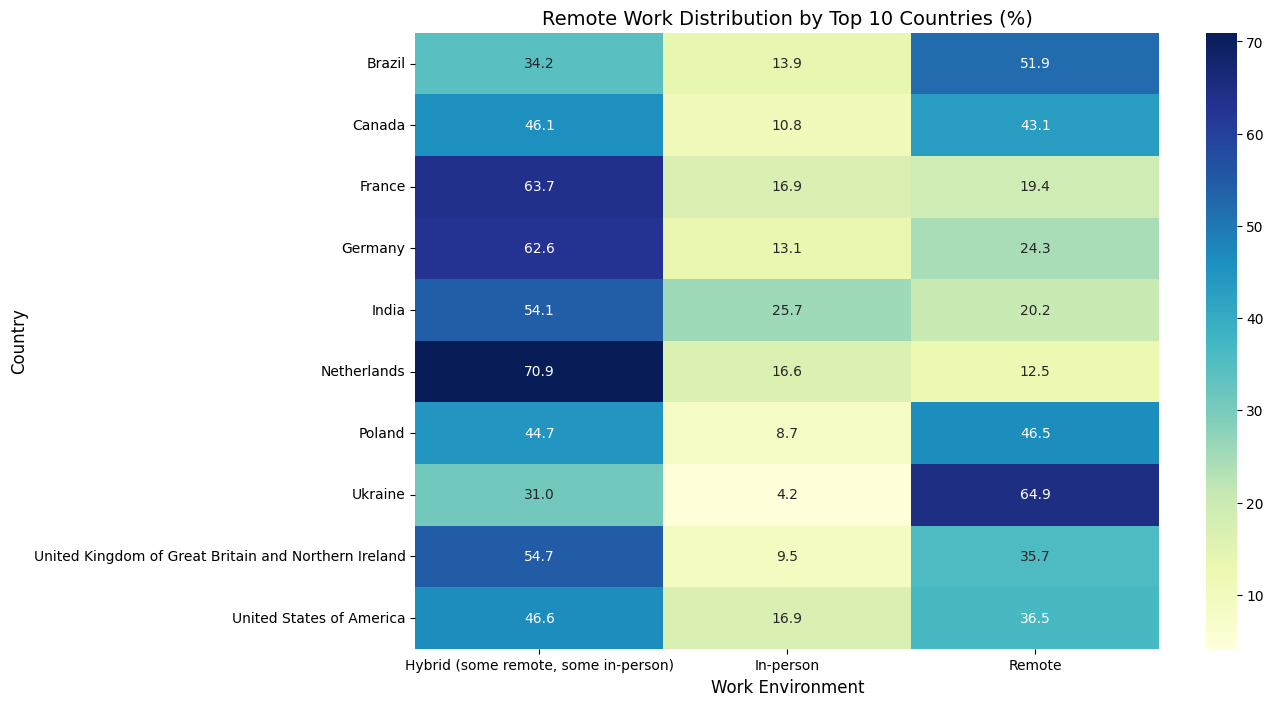

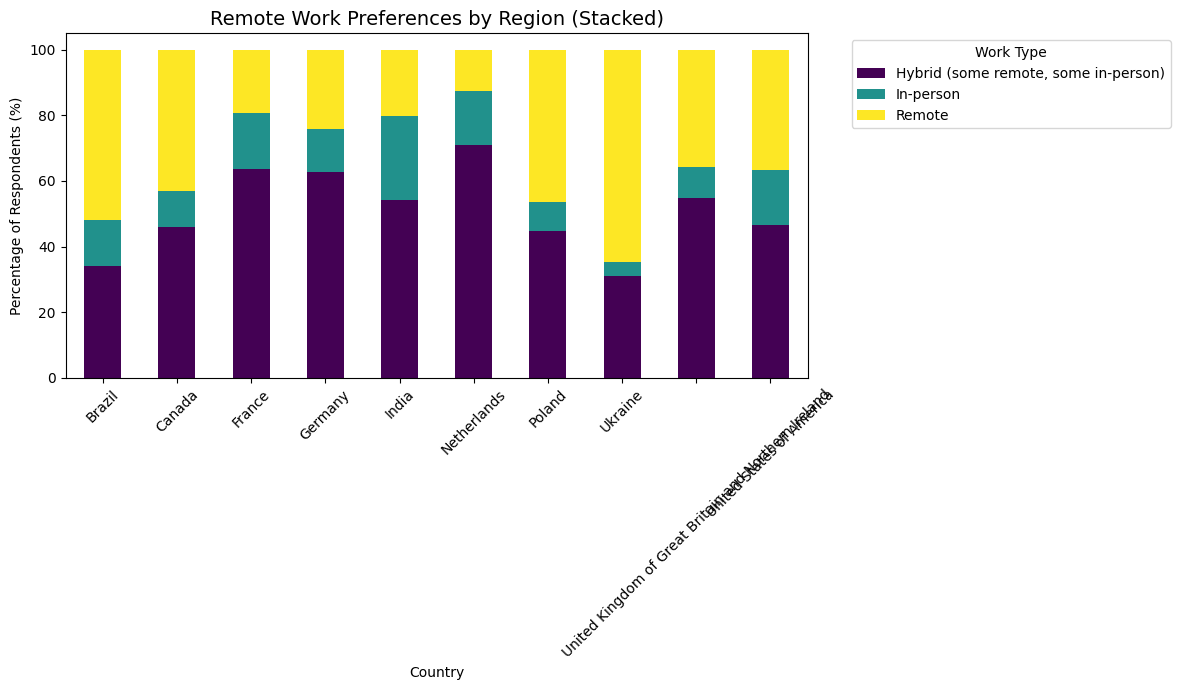

In [8]:
## Write your code here
# Filter for the top 10 countries by respondent count to ensure a readable plot
top_countries = df['Country'].value_counts().nlargest(10).index
df_filtered = df[df['Country'].isin(top_countries)]

# Create a Normalized Cross-tabulation
# We normalize by index (Country) to see the percentage of work types within each country
remote_region_ct = pd.crosstab(df_filtered['Country'], df_filtered['RemoteWork'], normalize='index') * 100

# Option A: Grouped Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(remote_region_ct, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Remote Work Distribution by Top 10 Countries (%)', fontsize=14)
plt.xlabel('Work Environment', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.savefig('remote_work_heatmap.png')

# Option B: Stacked Bar Chart
remote_region_ct.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Remote Work Preferences by Region (Stacked)', fontsize=14)
plt.ylabel('Percentage of Respondents (%)')
plt.xlabel('Country')
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('remote_work_stacked_bar.png')

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [ ]:
## Write your code here
# Clean 'YearsCodePro'
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0, 
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Ensure 'JobSat' is numeric 
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Drop rows with missing values in these columns to ensure valid calculation
df_corr = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Calculate Pearson Correlation (Linear relationship)
pearson_corr = df_corr['YearsCodePro'].corr(df_corr['JobSat'], method='pearson')

# Calculate Spearman Correlation (Rank relationship - often better for ordinal data)
spearman_corr = df_corr['YearsCodePro'].corr(df_corr['JobSat'], method='spearman')

print(f"Pearson Correlation Coefficient: {pearson_corr:.4f}")
print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_2361/951232972.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


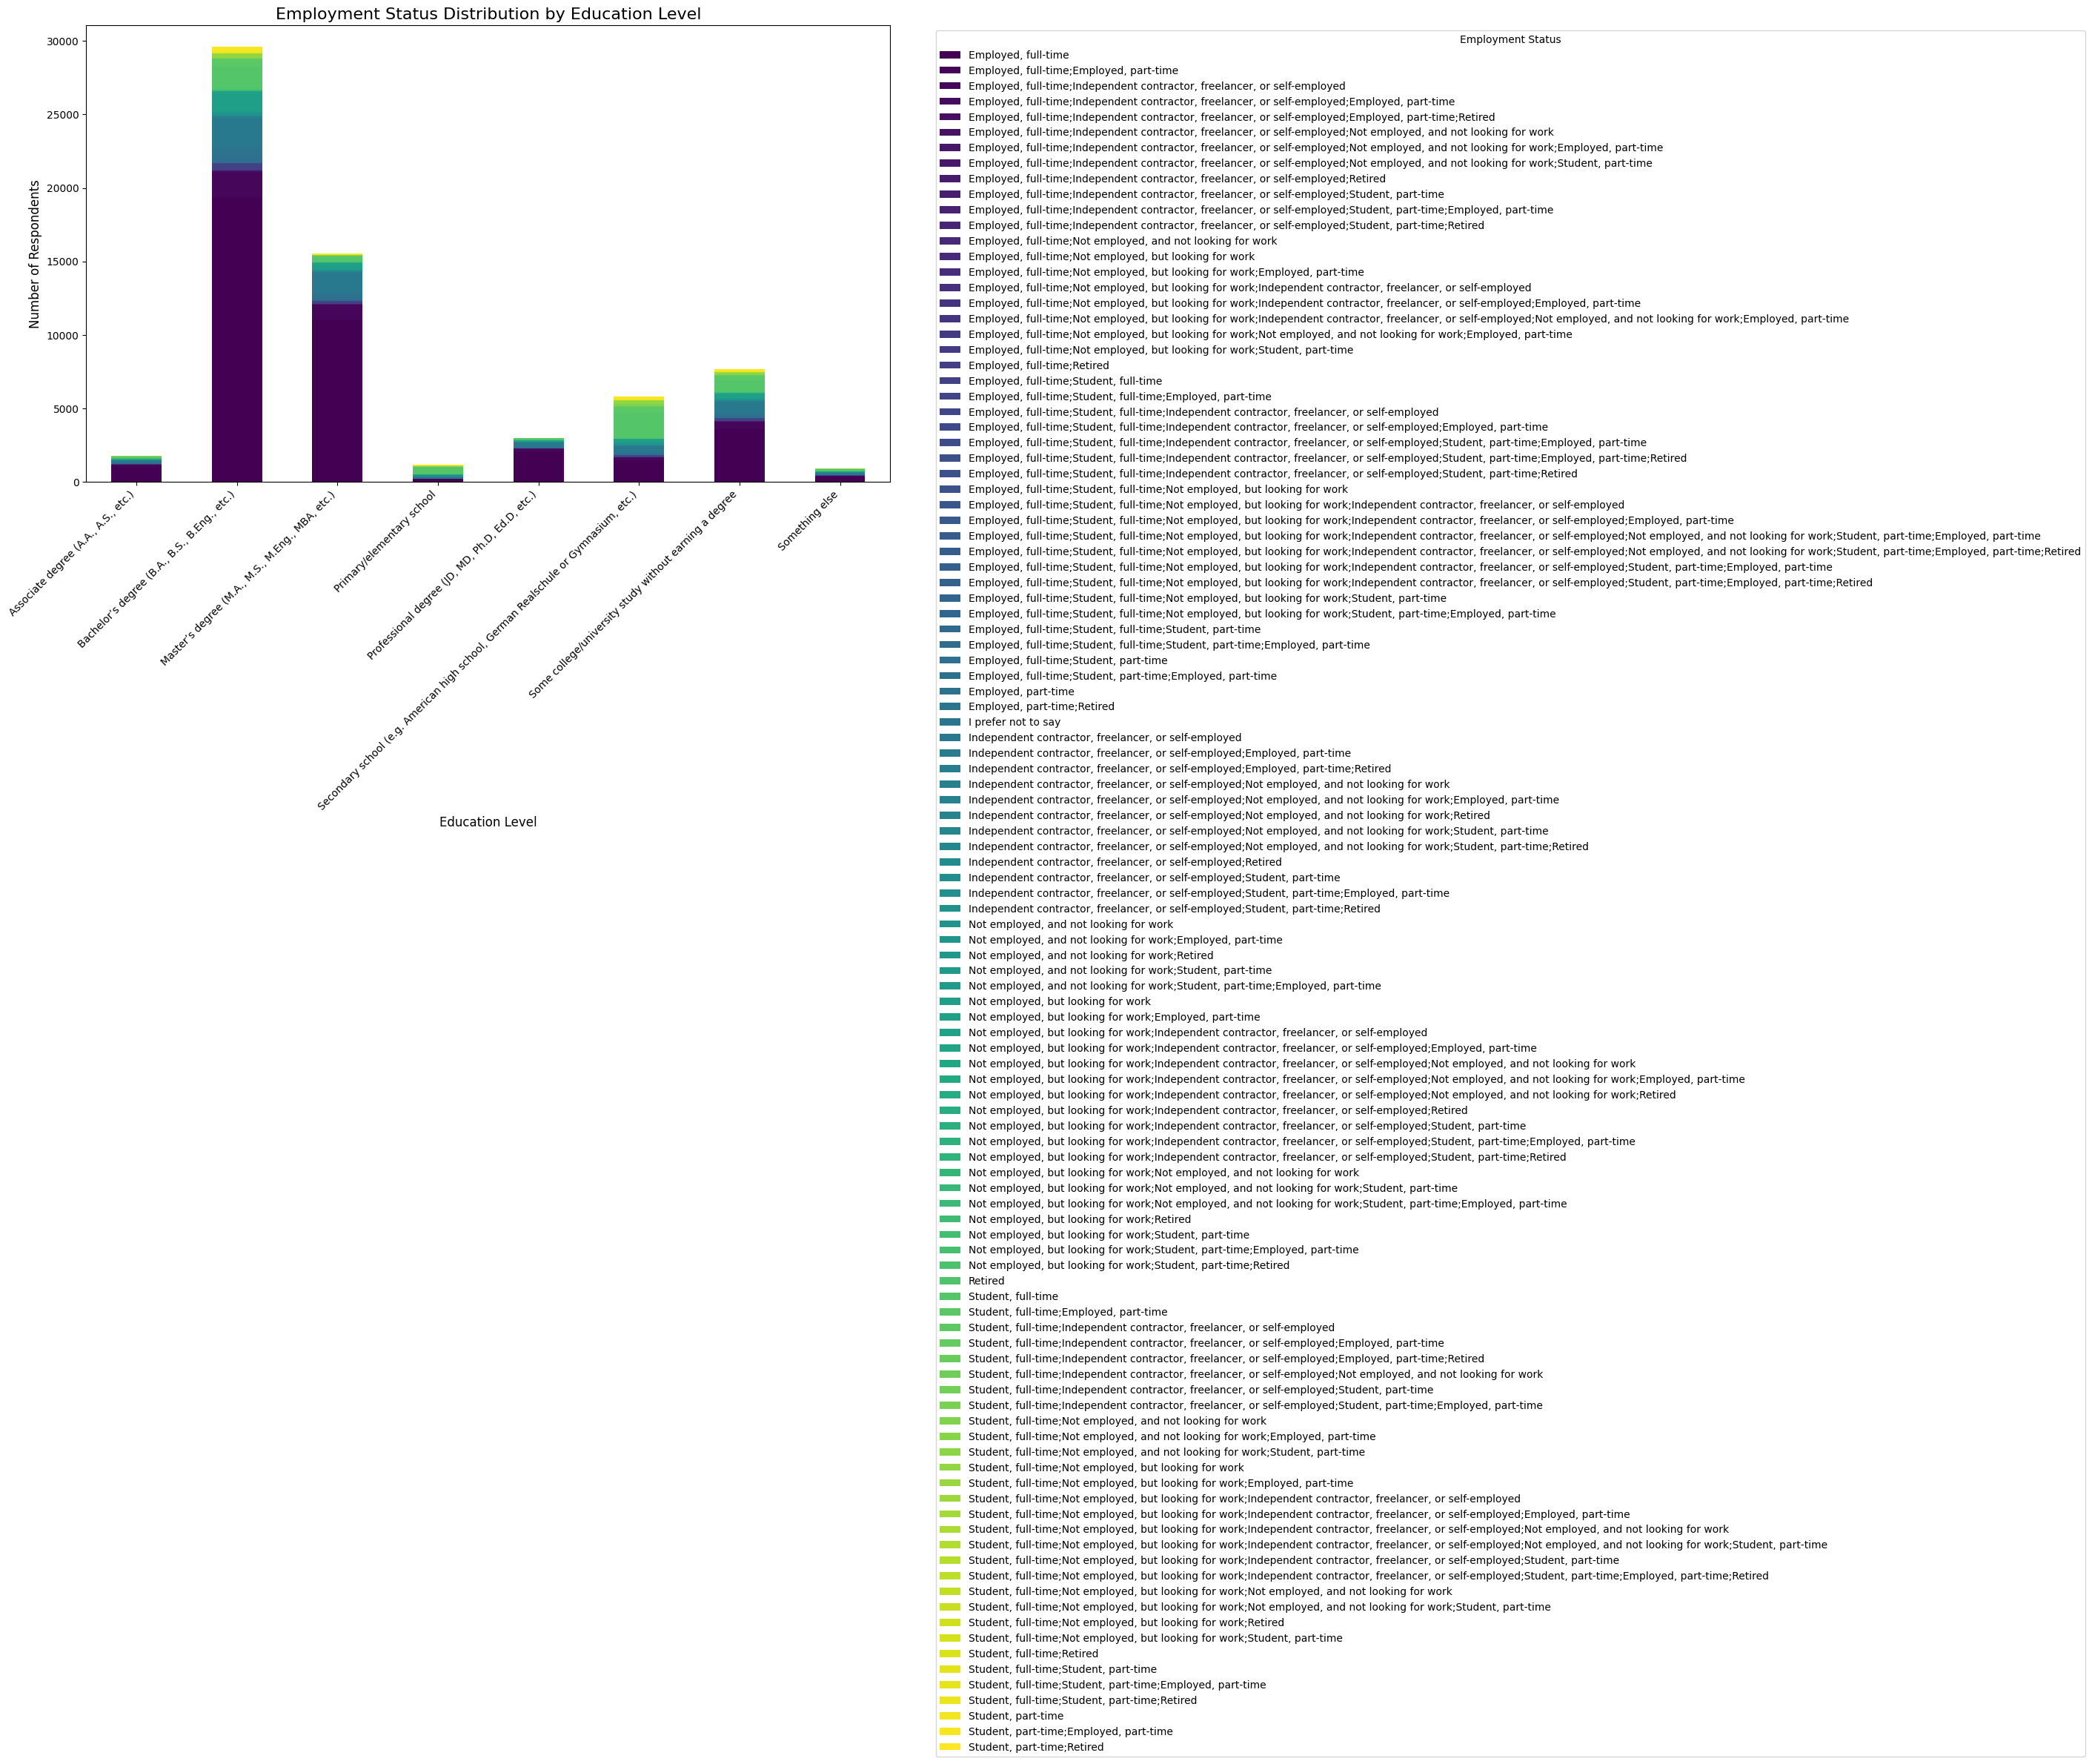

In [9]:
## Write your code here
# Create the cross-tabulation
ct = pd.crosstab(df['EdLevel'], df['Employment'])

# Visualize with a Stacked Bar Plot
ct.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Add labels and formatting
plt.title('Employment Status Distribution by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [10]:
## Write your code here
df.to_csv('cleaned_survey_data.csv', index=False)

print("Dataset saved successfully as 'cleaned_survey_data.csv'")

Dataset saved successfully as 'cleaned_survey_data.csv'


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
